In [83]:
from keras.preprocessing import image 
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras import backend as K

import matplotlib.pyplot as plt

In [3]:
model = VGG16(weights='imagenet')

In [59]:
img_path = '/home/a/Downloads/f9198618367adab418ec9c6b81d4b31c8701e4de.jpg'


In [60]:
img = image.load_img(img_path, target_size=(224, 224))

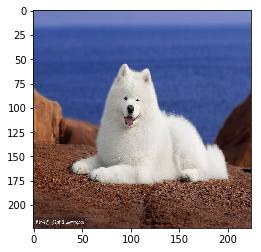

In [61]:
plt.imshow(img)

In [62]:
x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)

x = preprocess_input(x)

In [63]:
preds = model.predict(x)


In [67]:
print('predictd:',decode_predictions(preds,top=5)[0])

predictd: [('n02111889', 'Samoyed', 0.99471384), ('n02109961', 'Eskimo_dog', 0.002026981), ('n02114548', 'white_wolf', 0.0011760592), ('n02120079', 'Arctic_fox', 0.00088294793), ('n02110185', 'Siberian_husky', 0.0004547619)]


In [70]:
samoyed_dog_output = model.output[:, 386]

In [72]:
last_conv_layer = model.get_layer('block5_conv3')

grads = K.gradients(samoyed_dog_output, last_conv_layer.output)[0]

In [75]:
pooled_grads = K.mean(grads, axis=(0,1,2))

In [76]:
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

In [79]:
pooled_grads_value , conv_layer_output_value = iterate([x])

In [80]:
for i in range(512):
    conv_layer_output_value[:,:,i] *= pooled_grads_value[i]
    

In [81]:
heatmap = np.mean(conv_layer_output_value,axis = -1)

In [82]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)


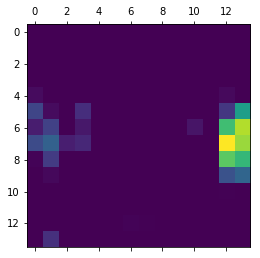

In [84]:
plt.matshow(heatmap)